# Notebook 4.1 -- Composing networks

The purpose of this notebook is to understand what happens when we feed one neural network into another. It works through an example similar to 4.1 and varies both networks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ReLU function함수(clip함수 활용) 정의
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [ ]:
# shallow neural network : one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):

  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y

In [ ]:
## Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  # fig : 그림의 전반적인 속성을 관리(ex. ax 설정 변경 가능)
  fig, ax = plt.subplots(1,2) # 두개의 out을 1*2 형태로 출력
  fig.set_size_inches(8.5, 8.5) # [가로, 세로]인치 설정
  fig.tight_layout(pad=3.0) # subplots간의 간격조정(pad : 여백 설정), fig.tight_layout()시, 자동으로 조절 가능

  # ax : subplots list, ax[0] = 첫번째 subplots을 나타냄
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output') # X, Y축 이름 설정
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1]) # X, Y축 범위 설정
  ax[0].set_aspect(1.0) # 가로세로 비율설정(1.0 = 가로세로 동일 = 'EQUAL')

  ax[1].plot(net1_out, net2_out,'b-')
  ax[1].set_xlabel('Net 1 output'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

# 조건문(net12_out의 값이 none값이 아닐 경우)
  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

Let's define two networks.  We'll put the prefixes n1_ and n2_ before all the variables to make it clear which network is which.  We'll just consider the inputs and outputs over the range [-1,1].

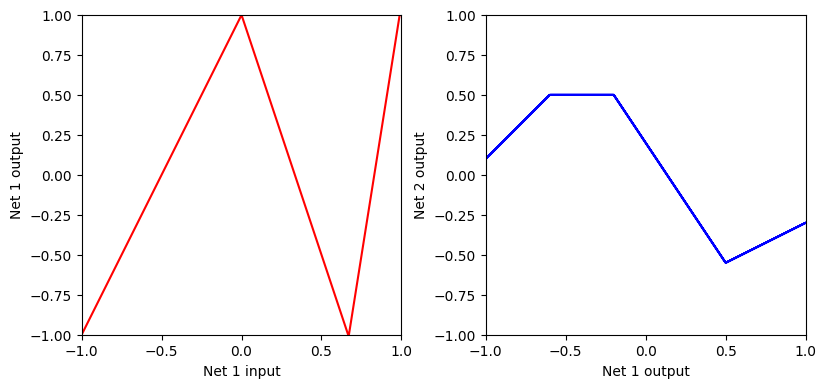

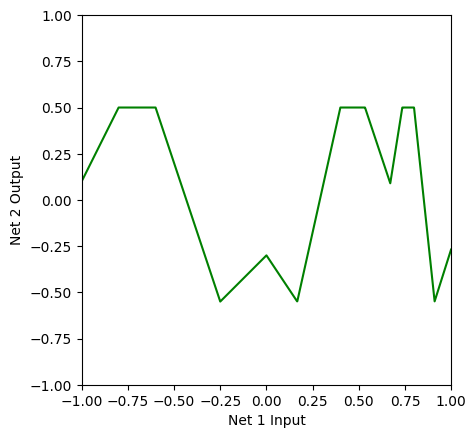

In [ ]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0
n1_theta_11 = -1.0

n1_theta_20 = 0
n1_theta_21 = 1.0

n1_theta_30 = -0.67
n1_theta_31 =  1.0

n1_phi_0 = 1.0
n1_phi_1 = -2.0
n1_phi_2 = -3.0
n1_phi_3 = 9.3


# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6
n2_theta_11 = -1.0

n2_theta_20 =  0.2
n2_theta_21 = 1.0

n2_theta_30 =  -0.5
n2_theta_31 =  1.0

n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Display the two inputs
x = np.arange(-1,1,0.001)

# We run the first  and second neural networks for each of these input values
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
net12_out = net2_out

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

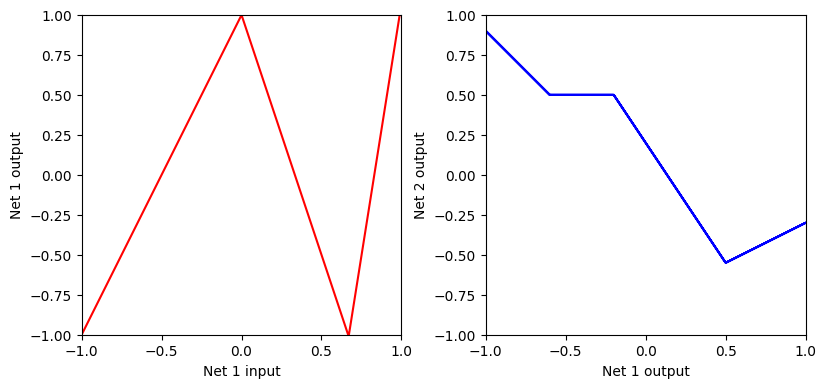

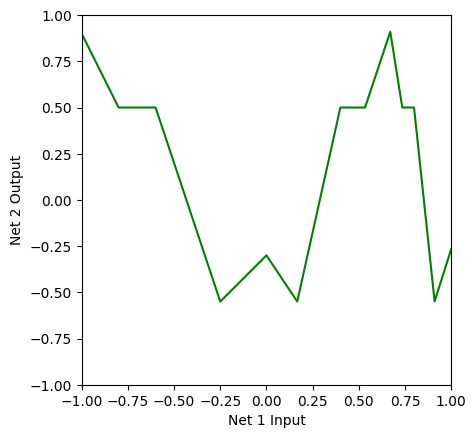

In [ ]:
# 두번째 신경망에 변화를 준 경우(note the *-1 change)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
net12_out = net2_out
plot_neural_two_components(x, net1_out, net2_out, net12_out)

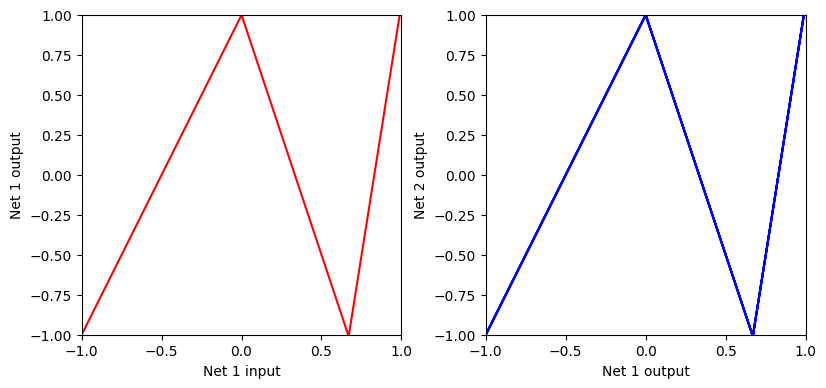

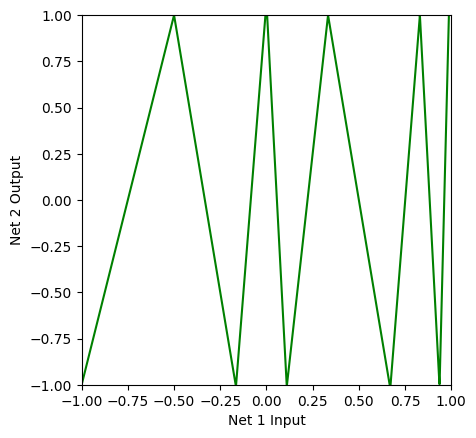

In [ ]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)

net12_out = net2_out_new
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)